# ETF Historical Data Fetcher

This notebook fetches historical price data for ETFs using yfinance library.
It's designed to work with the Reddit sentiment analysis data for ML model development.

## ETFs Covered:
- **QQQ**: Invesco QQQ Trust (Nasdaq-100) - Technology
- **DIA**: SPDR Dow Jones Industrial Average ETF - Industrials
- **IWM**: iShares Russell 2000 ETF - Consumer Discretionary
- **EFA**: iShares MSCI EAFE ETF - International
- **VTI**: Vanguard Total Stock Market ETF - Broad Market


In [1]:
# Install required packages (run this cell first if packages are not installed)
# !pip install yfinance pandas numpy matplotlib seaborn


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📦 Libraries imported successfully!")


📦 Libraries imported successfully!


## 1. Fetch QQQ Historical Data


In [3]:
# Fetch QQQ data for the last 2 years
print("🚀 Fetching QQQ historical data...")

qqq_ticker = yf.Ticker('QQQ')
qqq_data = qqq_ticker.history(period='2y', interval='1d')

print(f"✓ Successfully fetched {len(qqq_data)} records for QQQ")
print(f"Date range: {qqq_data.index[0].strftime('%Y-%m-%d')} to {qqq_data.index[-1].strftime('%Y-%m-%d')}")
print(f"Current price: ${qqq_data['Close'].iloc[-1]:.2f}")

# Display basic info
print("\n=== QQQ Data Info ===")
print(qqq_data.info())
print("\n=== Sample Data ===")
print(qqq_data.head())


🚀 Fetching QQQ historical data...
✓ Successfully fetched 501 records for QQQ
Date range: 2023-11-03 to 2025-11-03
Current price: $631.89

=== QQQ Data Info ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2023-11-03 00:00:00-04:00 to 2025-11-03 00:00:00-05:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           501 non-null    float64
 1   High           501 non-null    float64
 2   Low            501 non-null    float64
 3   Close          501 non-null    float64
 4   Volume         501 non-null    int64  
 5   Dividends      501 non-null    float64
 6   Stock Splits   501 non-null    float64
 7   Capital Gains  501 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 35.2 KB
None

=== Sample Data ===
                                 Open        High         Low       Close  \
Date                                                                        
2023-11-03 00:00

## 2. Add Technical Indicators


In [4]:
def add_technical_indicators(df):
    """Add technical indicators to the price data"""
    # Calculate returns
    df['Daily_Return'] = df['Close'].pct_change()
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
    
    # Moving averages
    df['MA_5'] = df['Close'].rolling(window=5).mean()
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    df['MA_20'] = df['Close'].rolling(window=20).mean()
    df['MA_50'] = df['Close'].rolling(window=50).mean()
    
    # Volatility (rolling standard deviation of returns)
    df['Volatility_5d'] = df['Daily_Return'].rolling(window=5).std()
    df['Volatility_20d'] = df['Daily_Return'].rolling(window=20).std()
    
    # Price momentum
    df['Price_Momentum_5d'] = df['Close'] / df['Close'].shift(5) - 1
    df['Price_Momentum_20d'] = df['Close'] / df['Close'].shift(20) - 1
    
    # Volume indicators
    df['Volume_MA_10'] = df['Volume'].rolling(window=10).mean()
    df['Volume_Ratio'] = df['Volume'] / df['Volume_MA_10']
    
    # Price position within recent range
    df['High_20d'] = df['High'].rolling(window=20).max()
    df['Low_20d'] = df['Low'].rolling(window=20).min()
    df['Price_Position'] = (df['Close'] - df['Low_20d']) / (df['High_20d'] - df['Low_20d'])
    
    return df

# Add technical indicators to QQQ data
qqq_data = add_technical_indicators(qqq_data)

print("✓ Technical indicators added to QQQ data")
print(f"New columns: {[col for col in qqq_data.columns if col not in ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']]}")


✓ Technical indicators added to QQQ data
New columns: ['Capital Gains', 'Daily_Return', 'Log_Return', 'MA_5', 'MA_10', 'MA_20', 'MA_50', 'Volatility_5d', 'Volatility_20d', 'Price_Momentum_5d', 'Price_Momentum_20d', 'Volume_MA_10', 'Volume_Ratio', 'High_20d', 'Low_20d', 'Price_Position']


## 3. Visualize QQQ Data


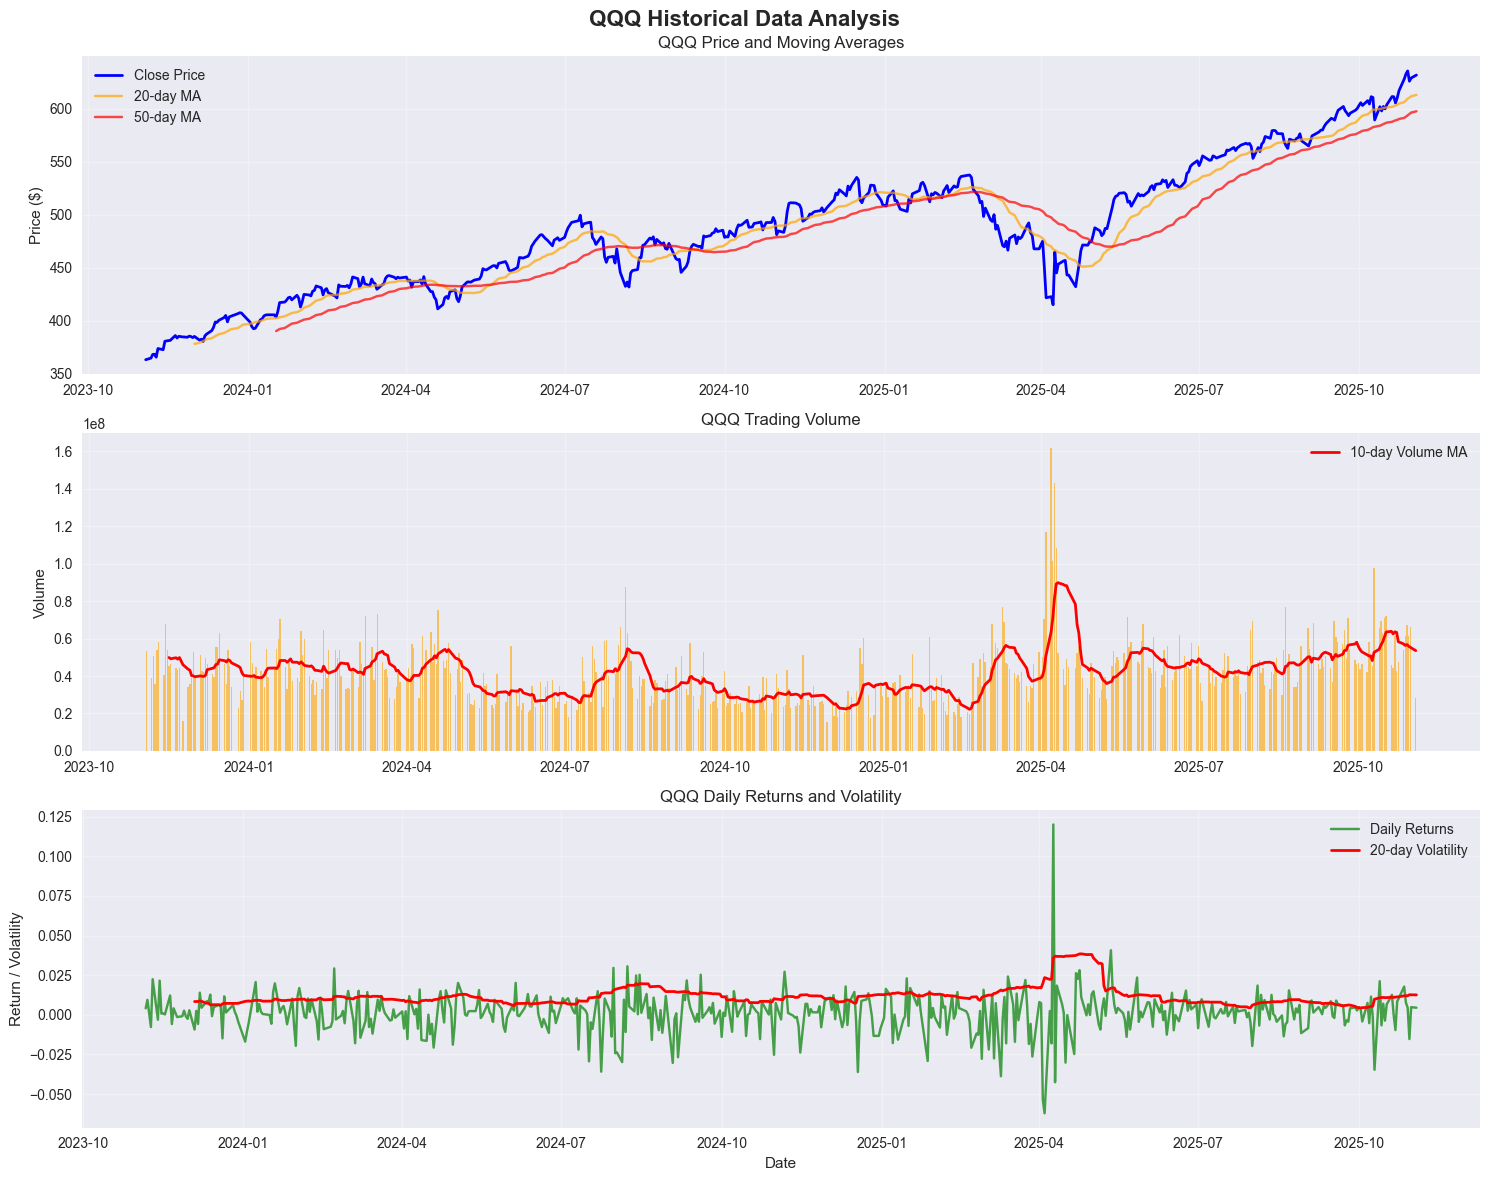

In [5]:
# Create comprehensive visualization
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('QQQ Historical Data Analysis', fontsize=16, fontweight='bold')

# Plot 1: Price and Moving Averages
axes[0].plot(qqq_data.index, qqq_data['Close'], label='Close Price', linewidth=2, color='blue')
axes[0].plot(qqq_data.index, qqq_data['MA_20'], label='20-day MA', alpha=0.7, color='orange')
axes[0].plot(qqq_data.index, qqq_data['MA_50'], label='50-day MA', alpha=0.7, color='red')
axes[0].set_title('QQQ Price and Moving Averages')
axes[0].set_ylabel('Price ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Volume
axes[1].bar(qqq_data.index, qqq_data['Volume'], alpha=0.6, color='orange')
axes[1].plot(qqq_data.index, qqq_data['Volume_MA_10'], color='red', linewidth=2, label='10-day Volume MA')
axes[1].set_title('QQQ Trading Volume')
axes[1].set_ylabel('Volume')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Daily Returns and Volatility
axes[2].plot(qqq_data.index, qqq_data['Daily_Return'], alpha=0.7, label='Daily Returns', color='green')
axes[2].plot(qqq_data.index, qqq_data['Volatility_20d'], color='red', linewidth=2, label='20-day Volatility')
axes[2].set_title('QQQ Daily Returns and Volatility')
axes[2].set_ylabel('Return / Volatility')
axes[2].set_xlabel('Date')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Save QQQ Data


In [6]:
# Save QQQ data to CSV
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"QQQ_historical_data_{timestamp}.csv"

qqq_data.to_csv(filename)
print(f"✓ Saved QQQ data to {filename}")
print(f"Shape: {qqq_data.shape}")
print(f"Columns: {list(qqq_data.columns)}")

# Display summary statistics
print("\n=== QQQ Summary Statistics ===")
print(f"Total trading days: {len(qqq_data)}")
print(f"Date range: {qqq_data.index[0].strftime('%Y-%m-%d')} to {qqq_data.index[-1].strftime('%Y-%m-%d')}")
print(f"Current price: ${qqq_data['Close'].iloc[-1]:.2f}")
print(f"Average daily return: {qqq_data['Daily_Return'].mean():.4f}")
print(f"Daily return volatility: {qqq_data['Daily_Return'].std():.4f}")
print(f"Total return: {(qqq_data['Close'].iloc[-1] / qqq_data['Close'].iloc[0] - 1) * 100:.2f}%")


✓ Saved QQQ data to QQQ_historical_data_20251103_143145.csv
Shape: (501, 23)
Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Capital Gains', 'Daily_Return', 'Log_Return', 'MA_5', 'MA_10', 'MA_20', 'MA_50', 'Volatility_5d', 'Volatility_20d', 'Price_Momentum_5d', 'Price_Momentum_20d', 'Volume_MA_10', 'Volume_Ratio', 'High_20d', 'Low_20d', 'Price_Position']

=== QQQ Summary Statistics ===
Total trading days: 501
Date range: 2023-11-03 to 2025-11-03
Current price: $631.89
Average daily return: 0.0012
Daily return volatility: 0.0130
Total return: 73.96%


## 5. Next Steps for ML Model Development

Now that you have both Reddit sentiment data and historical price data, here are the next steps:

### Immediate Next Steps:
1. **Temporal Alignment**: Align sentiment data with price data by date
2. **Feature Engineering**: Create features from sentiment data (rolling averages, volatility, momentum)
3. **Baseline Model**: Start with simple linear regression to test the concept
4. **Backtesting**: Implement walk-forward validation

### Key Features to Create:
- Sentiment compound score (3-day, 7-day, 14-day rolling averages)
- Sentiment volatility and momentum
- Volume-weighted sentiment
- Price momentum and technical indicators
- Cross-ETF sentiment correlations

### Model Architecture:
- **Baseline**: Linear regression with sentiment features
- **Tree-based**: Random Forest, XGBoost
- **Time series**: LSTM/GRU for sequential patterns
- **Ensemble**: Combine multiple models

Would you like to proceed with integrating the sentiment data with this price data?
